<a href="https://colab.research.google.com/github/kotini-1234/Biomass-Estimation-using-Machine-Learning/blob/main/biomass_estimationcatfish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/IoTPond7.csv")
print('Shape of dataset= ', df.shape)
df.head(5)

Shape of dataset=  (279612, 14)


<ipython-input-36-ea1146591392>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/IoTPond7.csv")


,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Fish_length(cm),Fish_weight(g),Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-06-18 13:02:10 CET,18-06-21,1,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,NaN,NaN,NaN
1,2021-06-18 13:02:30 CET,18-06-21,2,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,NaN,NaN,NaN
2,2021-06-18 13:02:50 CET,18-06-21,3,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,NaN,NaN,NaN
3,2021-06-18 13:03:10 CET,18-06-21,4,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,NaN,NaN,NaN
4,2021-06-18 13:03:40 CET,18-06-21,5,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,NaN,NaN,NaN


In [ ]:
print(df.columns.tolist())


['created_at', 'Date', 'entry_id', 'temperature(C)', 'turbidity (NTU)', 'Dissolved Oxygen (g/ml)', 'PH', 'ammonia(g/ml)', 'nitrate(g/ml)', 'Fish_length(cm)', 'Fish_weight(g)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


In [ ]:
df.rename(columns={'Fish_length(cm)':'Length','Fish_weight(g)':'Weight'},inplace = True) # 'inplace= true' to make change in current dataframe
df.sample(5)

,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Length,Weight,Unnamed: 11,Unnamed: 12,Unnamed: 13
32580,2021-07-02 21:42:39 CET,02-07-21,32581,26.2500,34,38.075,7.16260,inf,432,12.652857,18.981429,NaN,NaN,NaN
15579,2021-06-24 11:33:23 CET,24-06-21,15580,24.6250,28,26.979,7.76634,inf,771,9.075714,9.232857,NaN,NaN,NaN
7020,2021-06-20 08:01:08 CET,20-06-21,7021,25.5000,35,0.000,8.09319,inf,859,7.287143,4.358571,NaN,NaN,NaN
230708,2021-11-24T07:04:42+01:00,24-11-21,233123,26.0625,16,5.657,3.97135,NaN,1927,59.222857,708.714286,NaN,NaN,NaN
213975,2021-10-02T02:25:03+01:00,02-10-21,216390,25.6250,32,19.055,-1.32166,NaN,2245,42.010000,382.800000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279612 entries, 0 to 279611
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   created_at               279612 non-null  object 
 1   Date                     279612 non-null  object 
 2   entry_id                 279612 non-null  int64  
 3   temperature(C)           279612 non-null  float64
 4   turbidity (NTU)          279612 non-null  int64  
 5   Dissolved Oxygen (g/ml)  279612 non-null  float64
 6   PH                       279612 non-null  float64
 7   ammonia(g/ml)            185224 non-null  float64
 8   nitrate(g/ml)            279612 non-null  int64  
 9   Length                   279612 non-null  float64
 10  Weight                   279612 non-null  float64
 11  Unnamed: 11              0 non-null       float64
 12  Unnamed: 12              6 non-null       float64
 13  Unnamed: 13              7 non-null       object 
dtypes: f

In [ ]:
df.isna().sum()

,0
created_at,0
Date,0
entry_id,0
temperature(C),0
turbidity (NTU),0
Dissolved Oxygen (g/ml),0
PH,0
ammonia(g/ml),94388
nitrate(g/ml),0
Length,0


In [ ]:
df[df.Weight <= 0]

,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Length,Weight,Unnamed: 11,Unnamed: 12,Unnamed: 13


In [ ]:
df1 = df.drop([40])
print('New dimension of dataset is= ', df1.shape)
df1.head(5)

New dimension of dataset is=  (279611, 14)


,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Length,Weight,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-06-18 13:02:10 CET,18-06-21,1,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,NaN,NaN,NaN
1,2021-06-18 13:02:30 CET,18-06-21,2,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,NaN,NaN,NaN
2,2021-06-18 13:02:50 CET,18-06-21,3,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,NaN,NaN,NaN
3,2021-06-18 13:03:10 CET,18-06-21,4,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,NaN,NaN,NaN
4,2021-06-18 13:03:40 CET,18-06-21,5,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,NaN,NaN,NaN


In [ ]:
df1.drop(['created_at','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

In [ ]:
df1.select_dtypes(include='number').corr()

,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Length,Weight
entry_id,1.000000,0.211811,-0.353621,-0.174677,-0.572627,-0.064213,0.828034,0.936655,0.893010
temperature(C),0.211811,1.000000,-0.136417,-0.001184,-0.192605,-0.002821,0.341605,0.254229,0.212337
turbidity (NTU),-0.353621,-0.136417,1.000000,0.460836,-0.349164,-0.011997,-0.134763,-0.548401,-0.592031
Dissolved Oxygen (g/ml),-0.174677,-0.001184,0.460836,1.000000,-0.366343,-0.012165,0.072676,-0.241916,-0.254379
PH,-0.572627,-0.192605,-0.349164,-0.366343,1.000000,0.013047,-0.764269,-0.457181,-0.392567
ammonia(g/ml),-0.064213,-0.002821,-0.011997,-0.012165,0.013047,1.000000,-0.029047,-0.037223,-0.033630
nitrate(g/ml),0.828034,0.341605,-0.134763,0.072676,-0.764269,-0.029047,1.000000,0.807654,0.765650
Length,0.936655,0.254229,-0.548401,-0.241916,-0.457181,-0.037223,0.807654,1.000000,0.988584
Weight,0.893010,0.212337,-0.592031,-0.254379,-0.392567,-0.033630,0.765650,0.988584,1.000000


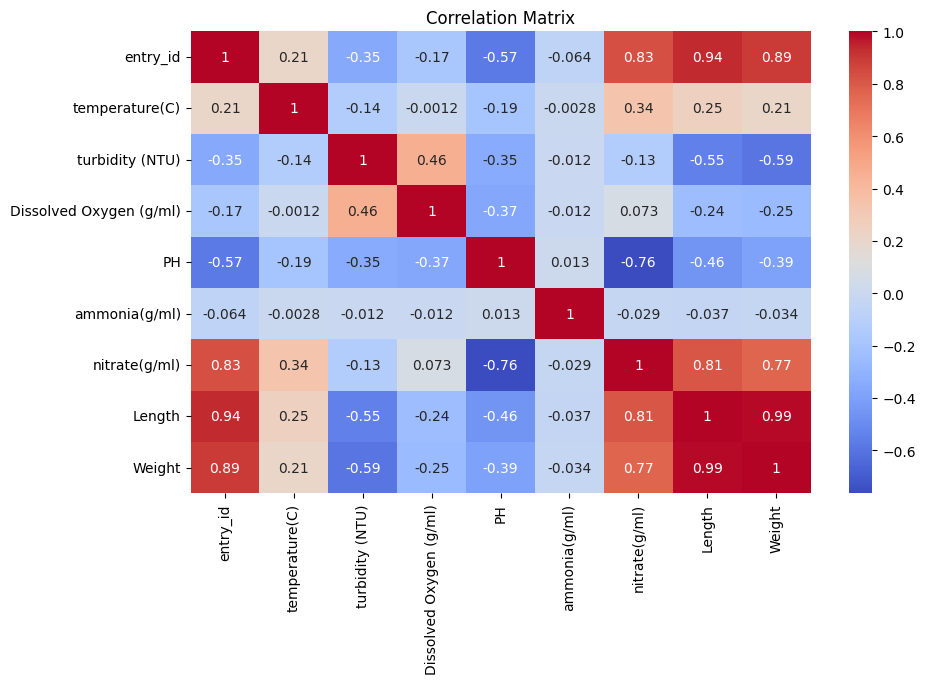

In [ ]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include='number')

# Plot the heatmap
plt.rcParams["figure.figsize"] = (10, 6)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df1.columns.tolist())


['Date', 'entry_id', 'temperature(C)', 'turbidity (NTU)', 'Dissolved Oxygen (g/ml)', 'PH', 'ammonia(g/ml)', 'nitrate(g/ml)', 'Length', 'Weight', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


In [ ]:
df2 = df1.drop(['Date','temperature(C)', 'turbidity (NTU)', 'Dissolved Oxygen (g/ml)', 'PH', 'ammonia(g/ml)', 'nitrate(g/ml)','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head()

New dimension of dataset is=  (279611, 3)


,entry_id,Length,Weight
0,1,6.772857,3.037143
1,2,6.772857,3.037143
2,3,6.772857,3.037143
3,4,6.772857,3.037143
4,5,6.772857,3.037143


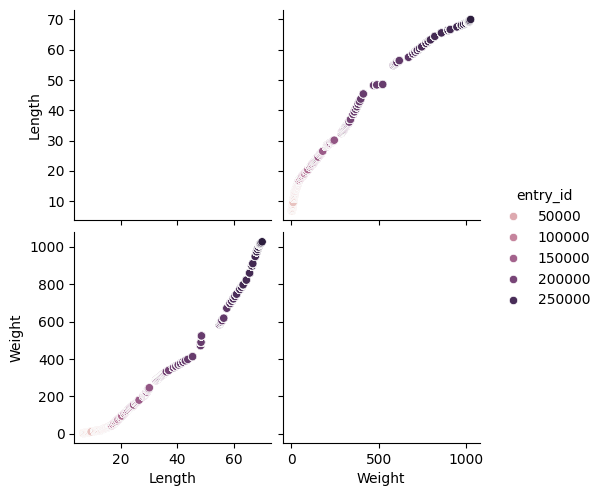

In [ ]:
sns.pairplot(df2, kind = 'scatter', hue = 'entry_id')

Text(0.5, 1.0, 'Outlier Detection based on Weight')

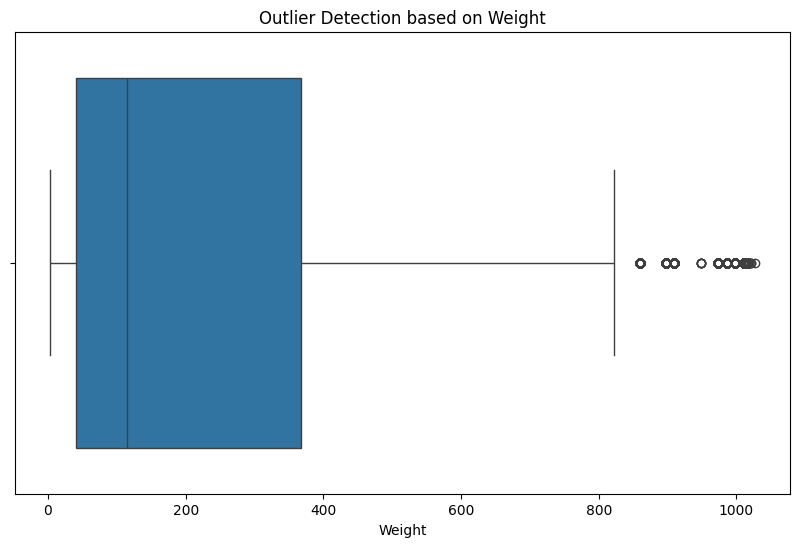

In [ ]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on Weight')

In [ ]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]

In [ ]:
outlier_detection(df2['Weight'])

Text(0.5, 1.0, 'Outlier Detection based on Height')

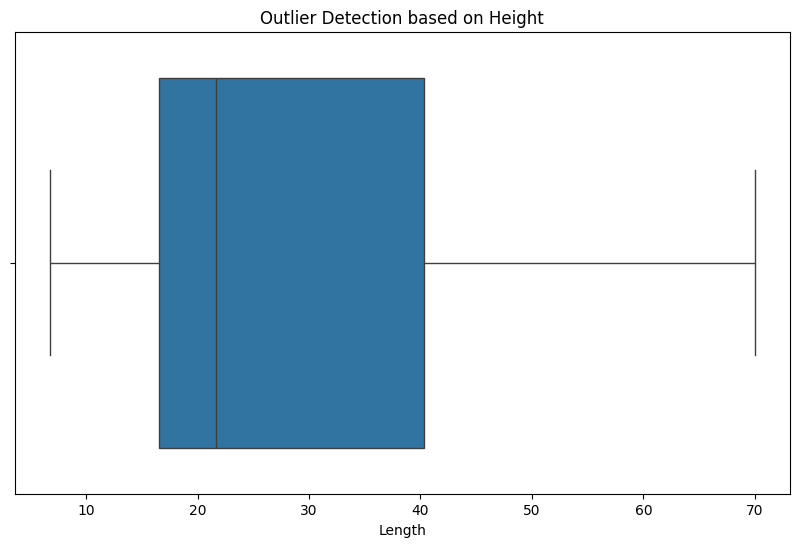

In [ ]:
sns.boxplot(x =df2['Length'])
plt.title('Outlier Detection based on Height')

In [ ]:
df3 = df2.drop([142,143,144])
df3.shape

(279608, 3)

In [ ]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
entry_id,279608.0,140552.173854,81592.754753,1.000000,69906.75,139808.500000,212124.250000,282026.000000
Length,279608.0,30.606867,19.687316,6.772857,16.50,21.695714,40.321429,69.985714
Weight,279608.0,279.858173,324.127162,3.037143,41.00,114.128571,368.057143,1026.457143


In [ ]:
X = df3[['Length']] # Select columns using column name
X.head()

,Length
0,6.772857
1,6.772857
2,6.772857
3,6.772857
4,6.772857


In [ ]:
y = df3[['Weight']]
y.head(5)

,Weight
0,3.037143
1,3.037143
2,3.037143
3,3.037143
4,3.037143


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (223686, 1)
X_test dimension=  (55922, 1)
y_train dimension=  (223686, 1)
y_train dimension=  (55922, 1)


In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('coef= ', model.coef_)
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [[16.27467536]]
intercept=  [-218.23057185]
score=  0.9773207367916006


In [ ]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,55912,55913,55914,55915,55916,55917,55918,55919,55920,55921
Weight,63.271429,708.714286,214.571429,44.200000,36.542857,32.085714,26.142857,42.371429,38.028571,985.885714,...,1012.471429,796.414286,148.714286,733.771429,30.600000,796.414286,18.981429,721.242857,771.357143,733.771429
Predicted Weight,77.387281,745.602202,250.154585,55.834961,38.444308,26.587045,10.777360,52.673024,42.396729,894.538731,...,905.163769,811.189144,175.174831,764.341328,22.634623,811.189144,-12.309430,754.971765,792.450018,764.341328


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

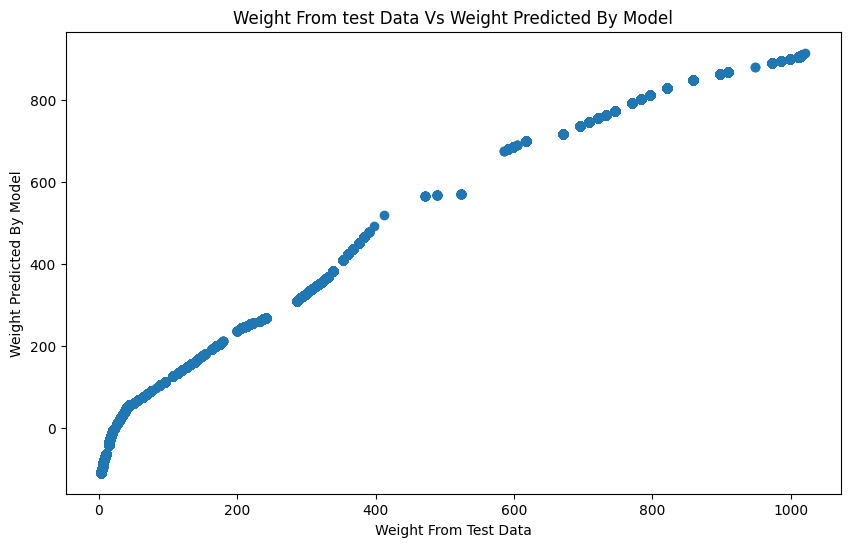

In [ ]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

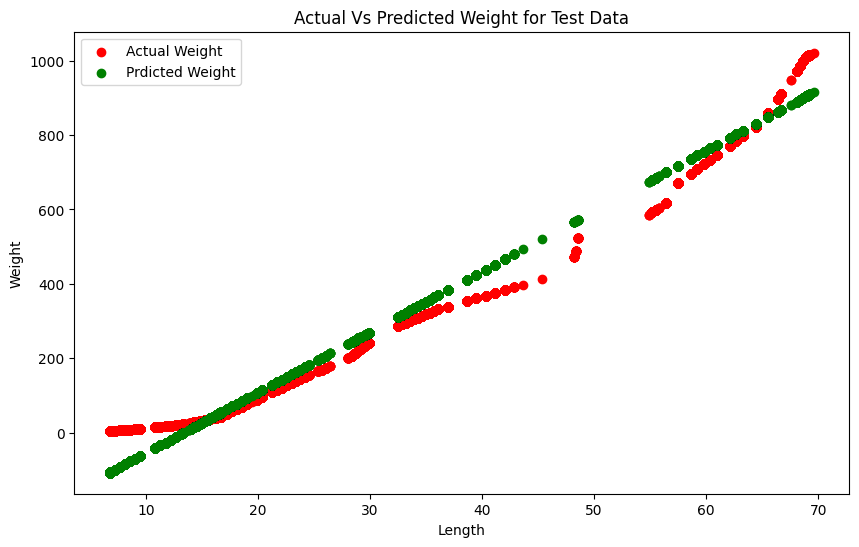

In [ ]:
plt.scatter(X_test['Length'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Length'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()